In [9]:
import scipy.io as spio
import numpy as np
from Functions import windowmaker, makecsv, makefeaturecsv, asign_ex2_gesture, asign_ex3_gesture

In [1]:
import tensorflow as tf

# Verifica se o TensorFlow detecta a GPU
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print("GPU detectada:", gpu_devices)
else:
    print("Nenhuma GPU detectada")

Nenhuma GPU detectada


In [115]:

import scipy.io as spio
import numpy as np
from Functions import windowmaker, makecsv, makefeaturecsv, asign_ex2_gesture, asign_ex3_gesture


##### Sort ###########

# This script loads and segments the sEMG data from the Matlab files provided by the Ninapro DB1 database 
# for each of the 27 subjects and produces three CSV files for each subject: training, validation and test.
# An additional three CSV files are also created containing the extracted features of the specified feature set


#create dictionaries,lists and arrays for storing and sorting data values
emg_data = {}
spec_emg_data = {}
endlist = []

#list of desired gestures for classification within each exercise 
EX2_gest = [5,6,7,11,12,13,14,15,16]
EX3_gest = [1,2,4,14,17]

#define number of subjects
subject_list = list(range(1,40))

#iterate through all subject in database and load subject EMG matlab files into dictionaries
for i in subject_list: 
    emg_data["subject{}".format(i)]={}
    emg_data["subject{}".format(i)]["ex2"]= spio.loadmat("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/Databases/NinaproDB2/DB2_s{}/S{}_E2_A1.mat".format(i,i),variable_names = "emg") #load files from stored location 
    emg_data["subject{}".format(i)]["ex3"]= spio.loadmat("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/Databases/NinaproDB2/DB2_s{}/S{}_E3_A1.mat".format(i,i),variable_names = "emg")#load files from stored location 
    print(i)
    

    #create nested dictionaries to store gesture classes for corresponding EMG data and 
    #specific EMG data for each gesture for each subject 

    #access gesure classes for each subject
    emg_data["subject{}".format(i)]["ex2"]["r"] = {}
    emg_data["subject{}".format(i)]["ex2"]["r"]= spio.loadmat("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/Databases/NinaproDB2/DB2_s{}/S{}_E2_A1.mat".format(i,i),variable_names= "restimulus")
    
    spec_emg_data["subject{}".format(i)]={} #instantiate nested subject specific EMG dicitionary 

    #for each desired gesture in EX2 for specific subject store  
    # corresponding segmented EMG data in nested dictionary 
    for l in EX2_gest:
        a = asign_ex2_gesture(l) #use function to renumber ex2 gestures between 0-9
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)] = {}
        loclist = [] #create list to store positions of specific gesture data within exercise 1 data 
        loc = np.where(emg_data["subject{}".format(i)]["ex2"]["r"]["restimulus"]==l) #search through class data to find locations of specific gesture data within exercise 2 data 
        print(loc)
        #determine locations of sEMG data for each repetition of the gesture
        loclist.append(loc[0][0]) 
        for x,y in zip(loc[0][::],loc[0][1::]): #find gesture locations at the border between the gesture and rest 
            if y-x != 1:    
                loclist.append(x)
                loclist.append(y)
        loclist.append(loc[0][-1])#append last value
        
        #use gesture 5 positions in order to extract rest position data as there is no specific 
        # exercise for rest data hence it must be extracted from breaks between gesture repetitions
        if l ==5:
            restlist = loclist
            #add rest data to nested dictionary taken from rests periods between repetitions of the first gesture
            spec_emg_data["subject{}".format(i)]["gesture0"] = {}
            
            #segement each rest gesture repetition using "windowmaker" function and store in specific nested dictionary entry
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition1"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[1]+1:restlist[2]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition2"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[3]+1:restlist[4]])        
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition3"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[5]+1:restlist[6]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition4"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[7]+1:restlist[8]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition5"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[9]+1:restlist[10]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition6"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[11]+1:restlist[12]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition7"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[13]+1:restlist[14]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition8"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[15]+1:restlist[16]])
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition9"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[17]+1:restlist[18]])
            
            
        #retreive 10th rest repetition from gesture 6 data
        if l ==6:
            restlist = loclist
            spec_emg_data["subject{}".format(i)]["gesture0"]["repitition10"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][restlist[1]+1:restlist[2]])
        

        #segement each gesture repetition using "windowmaker" function and store it in specific nested dictionary entry
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition1"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[0]:loclist[1]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition2"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[2]:loclist[3]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition3"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[4]:loclist[5]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition4"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[6]:loclist[7]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition5"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[8]:loclist[9]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition6"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[10]:loclist[11]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition7"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[12]:loclist[13]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition8"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[14]:loclist[15]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition9"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[16]:loclist[17]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(a)]["repitition10"] = windowmaker(emg_data["subject{}".format(i)]["ex2"]["emg"][loclist[18]:loclist[19]+1])

        
    #delete unused variables to increase computational efficiency
    del emg_data["subject{}".format(i)]["ex2"]

    ## repeat same process for EX3 gestures ##
    
    #access gesture classes for each subject
    emg_data["subject{}".format(i)]["ex3"]["r"]= {}
    emg_data["subject{}".format(i)]["ex3"]["r"] = spio.loadmat("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/Databases/NinaproDB2/DB2_s{}/S{}_E3_A1.mat".format(i,i),variable_names = "restimulus")
    
    
    for j in EX3_gest:
        b = asign_ex3_gesture(j) #use function to renumber ex3 gestures between 10-14
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)] = {}
        loclist = []#create list to store positions of specific gesture data within exercise 3 data
        loc = np.where(emg_data["subject{}".format(i)]["ex3"]["r"]["restimulus"]==j) #search through class data to find locations of specific gesture data within exercise 3 data 
        #determine locations of sEMG data for each reptiion of the gesture
        loclist.append(loc[0][0])
        for x,y in zip(loc[0][::],loc[0][1::]):#find gesture locations at the border between the gesture and rest
            if y-x != 1:
                loclist.append(x)
                loclist.append(y)
        
        loclist.append(loc[0][-1]) #append last value
    
        #segement each gesture repetition using "windowmaker" function and store in specific nested dictionary entry
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition1"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[0]:loclist[1]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition2"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[2]:loclist[3]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition3"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[4]:loclist[5]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition4"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[6]:loclist[7]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition5"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[8]:loclist[9]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition6"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[10]:loclist[11]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition7"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[12]:loclist[13]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition8"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[14]:loclist[15]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition9"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[16]:loclist[17]+1])
        spec_emg_data["subject{}".format(i)]["gesture{}".format(b)]["repitition10"] = windowmaker(emg_data["subject{}".format(i)]["ex3"]["emg"][loclist[18]:loclist[19]+1])

    #delete unused variables to increase computational efficiency
    del emg_data["subject{}".format(i)]
    
    #create training, validation and test CSV files contianing segemented sEMG gesture data
    makecsv(spec_emg_data["subject{}".format(i)],i)

    #create training, validation and test CSV files contianing segemented, 
    #feature extracted sEMG gesture data for specified feature set - in this case set 4 (SampEn Pipeline)
    makefeaturecsv(spec_emg_data["subject{}".format(i)],i,4)
    
   #delete surplus variables to increase computational efficiency
    del spec_emg_data["subject{}".format(i)]

    




1
(array([], dtype=int64), array([], dtype=int64))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [100]:
import math
from scipy.stats import skew, kurtosis
import numpy as np
import pywt 
import csv
from pyentrp import entropy as ent
import statsmodels.api as sm
import eeglib 

###### Functions ##########

# This script contains all the required functions to run the classifier model scripts and the Sort script


#Function to segment sEMG data into defined time windows 
#takes data to be segmented as input
def windowmaker(data):

        #define window parameters and sampling frequency
        window_length = 0.5 
        overlap = 0.7
        fs = 100 
        
        num_samp = int(fs*window_length) #calculate number of samples in each window 
        next_window = int(num_samp - num_samp*overlap) #calculate sample number at which next window starts
        windows = []
        window_start = 0
        while window_start + num_samp < len(data): #ensure window length is within data 
                window_end = window_start + num_samp  #set end of window
                subwindow = data[window_start:window_end] #generate data window
                windows.append(subwindow) #add subwindow to group of windows 
                window_start = window_start + next_window #set starting point of next window
        windows = np.array(windows).transpose(0, 2, 1)
        return windows

#Function to compute and extract features from input sEMG data 
#takes data to extract features from as input as well as the desired feature set 
def feature_extract(data,set):
        features = []
        length = len(data)

        #create TD feature set  
        if set == 1:
                mav = np.sum(np.absolute(data))/length #calculate mean absolute value
                cross = zc(data,mav)
                slope = slopechange(data)
                wavlen = np.sum(abs(np.diff(data))) #calculate waveform length 
                featvec = np.hstack((mav,cross,slope,wavlen)) #combine features into vector
                return featvec #len 4
        
        #create Enhanced TD feature set 
        if set == 2:
                mav = np.sum(np.absolute(data))/length  #calculate mean absolute value
                cross = zc(data,mav)
                slope = slopechange(data)
                wavlen = np.sum(abs(np.diff(data))) #calculate waveform length 
                rms = np.sqrt(np.mean(data **2)) #calculate rms of signal
                iemg = np.sum(abs(data))  
                skewness = skew(data)
                ar_coff = ARcoff(data)
                hjorth_param = Hjorth(data)
                featvec = np.hstack((mav,cross,slope,wavlen,rms,iemg,skewness,ar_coff,hjorth_param)) #combine features into vector
                return featvec 

        #create Ninapro feature set 
        if set == 3:
                mav = np.sum(np.absolute(data))/length  #calculate mean absolute value
                cross = zc(data,mav)
                slope = slopechange(data)
                wavlen = np.sum(abs(np.diff(data)))
                rms = np.sqrt(np.mean(data **2)) #calculate rms of signal
                hgram =  np.histogram(data, bins = 20)
                dwav = dwt(data)
                featvec = np.hstack((mav,cross,slope,wavlen,rms,hgram[0], dwav)) #combine features into vector
                return featvec  

        #create SampEn Pipeline feature set 
        if set == 4:
                sampentr = sampEn(data)
                wavlen = np.sum(abs(np.diff(data))) #calculate waveform length 
                rms = np.sqrt(np.mean(data **2)) #calculate rms of signal
                featvec = np.hstack((sampentr,wavlen,rms)) #combine features into vector
                return featvec 
        
        # extract SampEn feature 
        if set == 5:
                sampentr = sampEn(data)
                featvec = sampentr 
                return featvec 

        # extract SampEn and AR features 
        if set == 6:
                sampentr = sampEn(data)
                ar_coff = ARcoff(data)
                featvec = np.hstack((sampentr,ar_coff)) #combine features into vector
                return featvec 

        # extract AR feature 
        if set == 7:
                ar_coff = ARcoff(data)
                featvec = np.hstack((ar_coff)) 
                return featvec 



#Function to carry out marginal dsicrete wavelet transfrom 
#on input data and reduce number of coefficients by computing
#more features from returned dwt coefficients
def dwt(data):
        dwt = pywt.wavedec(data,'db7',level=3) #implement dwt

        #claculate mav of returned coefficients 
        mav0 = mav(dwt[0])
        mav1 = mav(dwt[1])
        mav2 = mav(dwt[2])
        mav3 = mav(dwt[3])

        #claculate signal power of returned coefficients 
        pwr1 = np.mean(dwt[1] **2)
        pwr2 = np.mean(dwt[2] **2)
        pwr3 = np.mean(dwt[3] **2)
        std1 = np.std(dwt[1])
        std2 = np.std(dwt[2])
        std3 = np.std(dwt[3])

        #claculate skew of returned coefficients 
        skw1 = skew(dwt[1])
        skw2 = skew(dwt[2])
        skw3 = skew(dwt[3])

        #claculate kurtosis of returned coefficients 
        kurt1 = kurtosis(dwt[1])
        kurt2 = kurtosis(dwt[2])
        kurt3 = kurtosis(dwt[3])
        vec = np.hstack((mav0,mav1,mav2,mav3,pwr1,pwr2,pwr3,std1,std2,std3,skw1,skw2,skw3,kurt1,kurt2,kurt3)) #combine features into vector
      
        return vec


#Function to calulate Hjorth parameters from input data
def Hjorth(data):
        result = all(element == data[0] for element in data)
        if (result):
                data[0] = data[0]+0.0000001  #add tiny value to data to prevent "nan" errors
        a = eeglib.features.hjorthActivity(data)
        c = eeglib.features.hjorthComplexity(data)
        m = eeglib.features.hjorthMobility(data)
        hjorth = [a,c,m]

        return hjorth

#Function to calulate autoregressive coefficients from input data
def ARcoff(data):
        result = all(element == data[0] for element in data)
        if (result):
                data[0] = data[0]+0.0000001    #add tiny value to data to prevent "nan" errors
        coff, sig = sm.regression.linear_model.burg(data, order=4 )
        for i in range(len(coff)):
                isnan = np.isnan(coff[i])  #check no "nan" values  produced and replace them with 0 if there are
                if isnan == True:
                        coff[i]= 0

        return coff

#Function to calulate zero crossings from input data, 
#takes data and mean aboslute value of data as input
def zc(data,mav):
        cross = 0
        for x,y in zip(data[::],data[1::]):
                if x > mav and y < mav:
                        cross +=1
                elif y > mav and x < mav:
                        cross +=1
        return int(cross)

#Function to calulate slope sign changes from input data
def slopechange(data):
        slope = 0
        for x,y,z in zip(data[::],data[1::],data[2::]):
                if y > x and y > z:
                        slope +=1
                elif y < x and y < z:
                        slope +=1
        return int(slope)

#Function to calulate mean absolute value from input data
def mav(data):
        length = len(data)
        mav = np.sum(np.absolute(data))/length
        return mav


#Function to calulate sample entropy from input data
def sampEn(data):
        result = all(element == data[0] for element in data)
        if (result):
                data[0] = data[0]+0.0000001
        std = np.std(data)
        sampEN = ent.sample_entropy(data,2,0.2*std)
        for i in range(len(sampEN)):
                isnan = np.isnan(sampEN[i])
                isinf = math.isinf(sampEN[i])
                if isnan == True:
                        sampEN[i]= 0
                elif isinf == True:
                        sampEN[i]= 0
       
        return sampEN


#Function used to set the length of the feaure vector according to
#feature set used in order to create feature CSV of the right size
def feat_size(featset):
        if featset == 1:
                row = 4
                vec = 10*row
                return row, vec
        
        if featset == 2:
                row = 14
                vec = 10*row
                return row, vec
        if featset == 3:
                row = 41
                vec = 10*row
                return row, vec
        if featset == 4:
                row = 4
                vec = 10*row
                return row, vec
        if featset == 5:
                row = 2
                vec = 10*row
                return row, vec

        if featset == 6:
                row = 6
                vec = 10*row
                return row, vec
        
        if featset == 7:
                row = 4
                vec = 10*row
                return row, vec


#Function to create training, validation and feature CSV files  
def makecsv(data,subject):

        #define gestures to add to CSV files
        gesturelist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

        #create training set CSV file
        f_name = "subject{}_train_data.csv".format(subject)  #create
        f = open(f_name,"w") #open CSV file
        writer = csv.writer(f)
        trainrep = [1,3,5,6,8,9,10] 
        for i in gesturelist:  #iterate through gestures
                for k in trainrep:   #iterate through gesture reptitions
                        window_num = 0
                        for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                                if window_num <1000:  # conditional statement to cap number samples for each gesture if desired
                                        row = []
                                        wl = list(window) 
                                        gest = [i]
                                        dat = gest + wl
                                        writer.writerow(dat) #add data window and label to CSV 
                                        window_num = window_num +1
                print(i,"finished")                
        f.close


        #create validation set CSV file
        f_name = "subject{}_validation_data.csv".format(subject) 
        f = open(f_name,"w") #open CSV file
        writer = csv.writer(f)
        val_rep = [2,4]
        for i in gesturelist:   #iterate through gestures
                for k in val_rep:   #iterate through gesture reptitions
                        window_num = 0
                        for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                                if window_num <1000:
                                        row = []
                                        wl = list(window)
                                        gest = [i]
                                        dat = gest + wl
                                        writer.writerow(dat) #add data window and label to CSV 
                                        window_num = window_num +1
        f.close
                
        #create test set CSV file
        f_name = "subject{}_test_data.csv".format(subject) 
        f = open(f_name,"w") #open CSV file
        writer = csv.writer(f)
        for i in gesturelist:
                k = 7
                window_num = 0
                for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                        if window_num <1000:
                                row = []
                                wl = list(window)
                                gest = [i]
                                dat = gest + wl
                                writer.writerow(dat) #add data window and label to CSV 
                                window_num = window_num +1
        f.close


#Function to create training, validation and test CSV files
#using extracted feature set data 
def makefeaturecsv(data,subject,featset):

        #define gestures to add to CSV files
        gesturelist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        
        row_size, featmat_size = feat_size(featset) #change dimensions of row vectors to fit different feature sets

        #create training set feature CSV file
        f_name = "subject{}_train_feature_data.csv".format(subject) 
        f = open(f_name,"w") 
        writer = csv.writer(f)
        trainrep = [1,3,5,6,8,9,10]
        for i in gesturelist: 
                for k in trainrep:
                        for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                                featmat = np.empty((0,row_size))  #create structure to append feature vectors to
                                for row in window:
                                        feat = feature_extract(row,featset)
                                        featmat = np.vstack((featmat,feat)) #combine feature vectors for each electrode channel
                                featmat = np.array(featmat)
                                xx = featmat.reshape(featmat_size)
                                row = []
                                row.append(i)    
                                row.append(xx)  
                                writer.writerow(row) #add feature vectors and label to CSV
        f.close
        
        #create validation set feature CSV file
        f_name = "subject{}_validation_feature_data.csv".format(subject) 
        f = open(f_name,"w") 
        writer = csv.writer(f)
        val_rep = [2,4]
        for i in gesturelist:
                for k in val_rep:
                        for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                                featmat = np.empty((0,row_size))  #create structure to append feature vectors to
                                for row in window:
                                        feat = feature_extract(row,featset)
                                        featmat = np.vstack((featmat,feat)) #combine feature vectors for each electrode channel
                                featmat = np.array(featmat)
                                xx = featmat.reshape(featmat_size)
                                row = []
                                row.append(i)  
                                row.append(xx) 
                                writer.writerow(row) #add feature vectors and label to CSV
        f.close
        
        #create test set feature CSV file
        f_name = "subject{}_test_feature_data.csv".format(subject) 
        f = open(f_name,"w") 
        writer = csv.writer(f)
        for i in gesturelist:
                k = 7
                for window in data["gesture{}".format(i)]["repitition{}".format(k)]:
                        featmat = np.empty((0,row_size))  #create structure to append feature vectors to
                        for row in window:
                                feat = feature_extract(row,featset) 
                                featmat = np.vstack((featmat,feat)) #combine feature vectors for each electrode channel
                        featmat = np.array(featmat)
                        xx = featmat.reshape(featmat_size)
                        row = []
                        row.append(i)  
                        row.append(xx)  
                        writer.writerow(row) #add feature vectors and label to CSV
                f.close
        
#Function to read CSV files and create input and target arrays 
#for direct input into DL classifier models, takes CSV file and the 
#the type of CSV file e.g. "train" as inputs 

def inputstargets(subject, type):
    # define input and target lists for classifier input
    inputs = []
    targets = []

    # open csv file specific to subject 
    data_file = open("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/subject{}_{}_data.csv".format(subject, type), 'r')  # open CSV file from stored location
    data_list = list(csv.reader(data_file))  # read csv file
    data_file.close()

    # extract and convert values from csv file into a list of float input values 
    # and integer target values
    for data in data_list:  # iterate through data windows stored in CSV
        if len(data) > 10:  # Certifique-se de que a linha tem pelo menos 11 colunas (índices de 0 a 10)
            window = []
            for j in range(1, 11):
                res = data[j].strip('][').split(' ')
                res2 = []
                for a in res:
                    if a != '':
                        res2.append(float(a))
                res2 = np.asfarray(res2)
                window.append(res2)
            inputs.append(window)
            gesture = int(data[0])  # extract gesture label from CSV
            targets.append(gesture)
        else:
            print(f"Erro: linha com menos de 11 colunas em subject {subject}, type {type}: {data}")
    return inputs, targets

#Function to read feature CSV files and create input and target arrays 
#for direct input into ML classifier models, takes CSV file and the 
#the type of CSV file e.g. "train" as inputs 

def featinputstargets(subject, type):
    # define input and target lists for classifier input
    inputs = []
    targets = []
    # open csv file specific to subject 
    data_file = open("C:/Users/PC/Desktop/TCC_Folders/TCC_code/teste/subject{}_{}_feature_data.csv".format(subject, type), 'r')  # open CSV file from stored location
    data_list = list(csv.reader(data_file))  # read csv file
    data_file.close()

    # iterate through feature vector windows stored in CSV
    for data in data_list:
        if len(data) > 1:  # Verifica se há pelo menos dois elementos na linha
            res = data[1].strip('][').split(' ')     
            res2 = []
            for a in res:
                if a != '':
                    res2.append(float(a))
            res2 = np.asfarray(res2)
            inputs.append(res2)
            gesture = int(data[0])  # extract gesture label from CSV
            targets.append(gesture)
        else:
            print(f"Erro: linha inválida em subject {subject}, type {type}: {data}")

    return inputs, targets
#Function to renumber gestures from DB1 Ex2 to be in 0-9 range
def asign_ex2_gesture(gesture):
        if gesture == 5:
                assigned = 1
        elif gesture == 6:
                assigned = 2
        elif gesture == 7:
                assigned = 3
        elif gesture == 11:
                assigned = 4
        elif gesture == 12:
                assigned = 5
        elif gesture == 13:
                assigned = 6
        elif gesture == 14:
                assigned = 7
        elif gesture == 15:
                assigned = 8
        elif gesture == 16:
                assigned = 9
        return assigned

#Function to renumber gestures from DB1 Ex3 to be in 10-14 range
def asign_ex3_gesture(gesture):
        if gesture == 1:
                assigned = 10
        elif gesture == 2:
                assigned = 11
        elif gesture == 4:
                assigned = 12
        elif gesture == 14:
                assigned = 13
        elif gesture == 17:
                assigned = 14
        return assigned


Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []
Erro: linha inválida em subject 1, type train: []


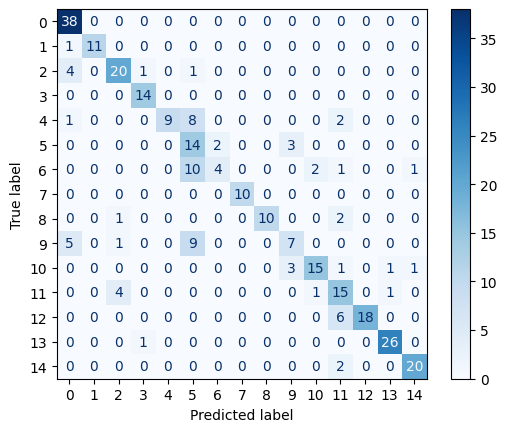

avg: 75.2442996742671 values: [75.24429967]
train times [0.02154088]
test times [0.]
 avg.train times 0.02154088020324707
avg. test times 0.0
 cum.train times 0.02154088020324707
cum. test times 0.0


In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import time

#instantiate LDA classifier 
LDA = LinearDiscriminantAnalysis(solver = "svd")    

#define subject datasets to evaluate 
subjects = [1]

#define lists to store data accumulated across multiple subjects
acc = []
all_train_time = []
all_test_times = []

#iterate through subjects 
for subject in subjects:
    
    #retreive input sEMG feature data and target labels from CSV files
    inputs, targets = featinputstargets(subject,"train") 
    val_inputs, val_targets = featinputstargets(subject,"validation") 
    test_inputs, test_targets = featinputstargets(subject,"test")

    #start timer 
    start_time = time.time()

    #fit LDA model to training data 
    LDA.fit(inputs,targets)

    #calculate training time 
    train_time = (time.time() - start_time)

    #use LDA to classify test data
    tpred = LDA.predict(test_inputs)  #this was changed to val_inputs during validation

    #calculate test time 
    test_time = (time.time() - train_time -start_time)

    #store time values in appropriate lists 
    all_train_time.append(train_time)
    all_test_times.append(test_time)

    #evaulate LDA performance on test data set
    tscore = []
    for i, sample in enumerate(test_inputs):
        #check if the LDA classification was correct
        if round(tpred[i]) == test_targets[i]:  #this was changed to val_targets during validation
            tscore.append(1)
        else:
            tscore.append(0)
    pass

    # calculate the accuracy of LDA on test set
    score = np.asarray(tscore)
    test_acc = score.sum() / score.size * 100
    print("test accuracy:", test_acc)
    
    #create and display confusion matrix
    cm = confusion_matrix(test_targets, tpred)
    display = "0", "1", "2","3","4","5","6","7","8","9","10","11","12","13","14"
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display)
    disp.plot(cmap="Blues")

    #create classification report 
    cr = classification_report(test_targets,tpred)
    print(cr)
    plt.show()
    
    #add specific subject accuracy to list
    acc.append(test_acc)

#calculate average classification accuracy     
acc = np.array(acc)
totalaccuracy = np.mean(acc)
print("avg:",totalaccuracy,"values:",acc)

#calculate average and cumulative train and test times 
all_train_time = np.array(all_train_time)
all_test_times = np.array(all_test_times)

avg_train = np.mean(all_train_time)
avg_test = np.mean(all_test_times)

cum_train = np.sum(all_train_time)
cum_test = np.sum(all_test_times)

print("train times", all_train_time)
print("test times", all_test_times)

print(" avg.train times", avg_train)
print("avg. test times", avg_test)

print(" cum.train times", cum_train)
print("cum. test times", cum_test)

In [101]:
from Functions import inputstargets 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential, optimizers, callbacks
from keras.layers import Dense, LSTM, InputLayer, Bidirectional,Dropout
from keras.utils import to_categorical
import time


#define subject datasets to evaluate 
subjects = [1]

#define lists to store data accumulated across multiple subjects
all_acc = []
all_train_time = []
all_test_times = []


#Function that defines stepwise learning rate for DL models 
def scheduler(epoch):
  if epoch < 50:
    lr =0.001
  elif 50 <= epoch <100:
    lr =0.0005
  elif 100 <= epoch <150:
    lr =0.0001
  elif epoch >= 150:
    lr =0.00001

  return lr 

#iterate through subjects 
for subject in subjects:

    #retreive input sEMG feature data and target labels from CSV files
    inputs, targets = inputstargets(subject,"train") 
    val_inputs, val_targets = inputstargets(subject,"validation") 
    test_inputs, test_targets = inputstargets(subject,"test")

    #reshape data inputs to preferred LSTM configuration 
    inputs = np.array(inputs).transpose(0, 2, 1)
    val_inputs = np.array(val_inputs).transpose(0, 2, 1)
    test_inputs = np.array(test_inputs).transpose(0, 2, 1)

    #one hot encode target data 
    targets = to_categorical(targets, num_classes = 15)
    val_targets = to_categorical(val_targets, num_classes= 15)
    test_targets = to_categorical(test_targets, num_classes = 15)

    #define optimised LSTM architecture 
    model = Sequential()

    model.add(InputLayer(input_shape = (40,10)))
    model.add(Dense(400))
    model.add(Bidirectional(LSTM(1000, return_sequences = True)))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(1000)))
    model.add(Dropout(0.4))
    model.add(Dense(15, activation='softmax'))

    
    #compile model and define loss function and otpimiser 
    model.compile(optimizer= optimizers.Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    callback = callbacks.LearningRateScheduler(scheduler) #implement stepwise learning rate

    #start timer 
    start_time = time.time()

    #train and validate the model and define epochs and batch size  
    history = model.fit(inputs,targets, epochs=125,validation_data=(val_inputs,val_targets), verbose=1, callbacks=[callback], batch_size = 32)

    #calculate training time 
    train_time = (time.time() - start_time)

    #test the model
    loss, acc = model.evaluate(test_inputs,test_targets, verbose=1)

    #store accuracy for specific subject 
    all_acc.append(acc)

    #calculate test time 
    test_time = (time.time() - train_time -start_time)

    #store time values in appropriate lists 
    all_train_time.append(train_time)
    all_test_times.append(test_time) 


    #plot graph of loss against epoch for validation set 
    plt.figure(1)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Test')
    plt.xlabel('Epoch')
    plt.ylabel("Model loss")
    plt.legend()
    plt.show()

    #plot graph of accuracy against epoch for validation set
    plt.figure(2)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.xlabel('Epoch')
    plt.ylabel("Classification accuracy/%")
    plt.legend()
    plt.show()

    
    #test LSTM again using model.predict function so that performance metrics can be generated 

    #create lists to store actual and predicted classes
    # to allow performance metrics to be generated 
    Actual_Class = []
    Predicted_Class = []

    for input, target in zip(test_inputs, test_targets):
        # predict gesture classes and append to list
        prediction = model.predict(np.asarray([input])) 
        Predicted_Class.append(np.argmax(prediction)) 
        # append actual gesture class of to list
        Actual_Class.append(np.argmax(target))
        
    #create and display confusion matrix
    cm = confusion_matrix(Actual_Class, Predicted_Class)
    display = "0", "1", "2","3","4","5","6","7","8","9","10","11","12","13","14"
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display)
    disp.plot(cmap="Blues")

    #create classification report 
    cr = classification_report(Actual_Class,Predicted_Class)
    print(cr)
    plt.show()


#calculate average classification accuracy     
all_acc = np.array(all_acc)
totalaccuracy = np.mean(all_acc)
print("avg:",totalaccuracy,"values:",all_acc)

#calculate average and cumulative train and test times 
all_train_time = np.array(all_train_time)
all_test_times = np.array(all_test_times)

avg_train = np.mean(all_train_time)
avg_test = np.mean(all_test_times)

cum_train = np.sum(all_train_time)
cum_test = np.sum(all_test_times)


print("train times", all_train_time)
print("test times", all_test_times)

print(" avg.train times", avg_train)
print("avg. test times", avg_test)

print(" cum.train times", cum_train)
print("cum. test times", cum_test)

IndexError: list index out of range